In [32]:
import editdistance as ed
import numpy as np
import networkx as nx

In [33]:
import matplotlib.pyplot as plt

In [34]:
with open("../data/ES/ES3_R1_spacers.txt") as f:
    lines = [x[:31] for x in f.readlines()][1:]

In [35]:
with open("../data/ES/ES3_R1_pairs.txt") as f:
    pairs = [[y[:31] for y in x[:-2].split(' ') ] for x in f.readlines()]

In [36]:
lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])

In [37]:
from collections import Counter, OrderedDict

In [38]:
counter = Counter(lines)
ord_dict = OrderedDict()

In [39]:
u_lines = []
counts = []
for item in counter.items():
    u_lines.append(item[0])
    counts.append(item[1])
    
u_lines = np.array(u_lines)
counts = np.array(counts)

In [40]:
args_s = np.argsort(counts)[::-1]

In [41]:
for l, c in zip(u_lines[args_s], counts[args_s]):
    ord_dict[l] = c


In [42]:
sp_to_n = {}

In [43]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = -1
    for comp_item in d.items():
        dist = ed.eval(init_item[0], comp_item[0])
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    return min_ed, answ_item

In [44]:
od = OrderedDict({"aaa" : 10, "acb" : 3, "aac" : 1, "xyc" : 1})

In [45]:
   
def squash(od, t):
    answ = OrderedDict()
    sp_to_n = {}
    index = 0
    
    for init_item in od.items():
        #ord_dict.pop(init_item[0])

        if len(answ) == 0 :
            print("new spacer:", init_item[0], init_item[1])
            answ[init_item[0]] = init_item[1]
            sp_to_n[init_item[0]] = index
            index += 1
        else:
#             min_ed = t
#             answ_item = -1
#             for comp_item in answ.items():
#                 dist = ed.eval(init_item[0], comp_item[0])
#                 if dist < min_ed:
#                     min_ed = dist
#                     answ_item = comp_item

#             if min_ed < t:
#                 answ[answ_item[0]] += init_item[1]
#                 sp_to_n[init_item[0]] = sp_to_n[answ_item[0]]
#                 print("add:", init_item[0], "to", answ_item[0], answ[answ_item[0]])
#             else:
#                 sp_to_n[init_item[0]] = index
#                 index += 1
#                 answ[init_item[0]] = init_item[1]
#                 print("new spacer:", init_item[0], init_item[1])
            min_ed, answ_item = find_closest(answ, init_item, t)
            if min_ed < t:
                answ[answ_item[0]] += init_item[1]
                sp_to_n[init_item[0]] = sp_to_n[answ_item[0]]
                print("add:", init_item[0], "to", answ_item[0], answ[answ_item[0]])
            else:
                sp_to_n[init_item[0]] = index
                index += 1
                answ[init_item[0]] = init_item[1]
                print("new spacer:", init_item[0], init_item[1])
    return answ, sp_to_n

            

In [46]:
squash(od, 3)

new spacer: aaa 10
add: acb to aaa 13
add: aac to aaa 14
new spacer: xyc 1


(OrderedDict([('aaa', 14), ('xyc', 1)]),
 {'aaa': 0, 'aac': 0, 'acb': 0, 'xyc': 1})

In [47]:
nd, sp_to_n = squash(ord_dict, 6)

new spacer: ACACGCCCTTATCAAATAGCTGTGATTTACC 27154
new spacer: GACAGAACGGCCTCAGTAGTCTCGTCAGGCT 19586
new spacer: AGTGCTGGACCATTTCAAATTCACAATAGAT 13653
new spacer: ATAGACCCCGAACAACAATACGCGCAAACCG 13288
new spacer: CAAGTGATATCCATCATCGCATCCAGTGCGC 10866
new spacer: GGAATGATATTTCAATAAATAATTATAACAA 7991
new spacer: TACCGTACAGACTGCCGGATATTATTTTTTT 7251
new spacer: CCCTCACACCGATTCGCCAAACGGTGGAGAA 6594
new spacer: CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA 6033
new spacer: AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG 4774
new spacer: TGCATGGCTTTGGCTTCCTCTTTGACGGACG 3645
new spacer: AGCTGGGCGAAATTTTGATTCATCGTGATGA 3548
new spacer: TATAGAGATCGTTTTTGGAATTTACAGCGAG 3521
new spacer: ATATATCAGAGCAAAAAACAAAGCCACAGCC 2763
new spacer: CATAAAGAAACTATTTTGCGTTTCGTTCAGG 2629
new spacer: TTTTACAGTGTCAACAATCGTTCCCTGATTG 2481
new spacer: CCGTAAGTGGTTTGAGCGATGATATTTGTGC 2271
new spacer: CCGCCGTTGGCACCGTCAAACTCCGGTACTG 1811
new spacer: GTAGTCCATCATTCCACCTATGTCTGAACTC 412
new spacer: TCGGTTCAGGCGTTGCAAACCTGGCTACCGG 319
new spacer: CTGTT

add: TACCGTACAGACTGCCGGATATTATTTCTTT to TACCGTACAGACTGCCGGATATTATTTTTTT 7468
add: CCGCTGCTCGAGCTGGTGGAGTGCTGCTATA to CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA 6073
add: ATAGACCCCGAATAACAATACGCGCAAACCG to ATAGACCCCGAACAACAATACGCGCAAACCG 13701
add: ACACGCCCTTAACAAATAGCTGTGATTTACC to ACACGCCCTTATCAAATAGCTGTGATTTACC 28092
add: GACAGAACGGCCACAGTAGTCTCGTCAGGCT to GACAGAACGGCCTCAGTAGTCTCGTCAGGCT 20162
add: TACCGTACAGACTGCCGGATATTATTCTTTT to TACCGTACAGACTGCCGGATATTATTTTTTT 7479
add: ATGGACCCCGAACAACAATACGCGCAAACCG to ATAGACCCCGAACAACAATACGCGCAAACCG 13712
add: GGAATGATATTTCAATAAGTAATTATAACAA to GGAATGATATTTCAATAAATAATTATAACAA 8151
add: ACACGCCCTTATCAAATAACTGTGATTTACC to ACACGCCCTTATCAAATAGCTGTGATTTACC 28103
add: ATAGACCCCGAACAACAATACGCGCAAACCA to ATAGACCCCGAACAACAATACGCGCAAACCG 13723
add: GGAATGGTATTTCAATAAATAATTATAACAA to GGAATGATATTTCAATAAATAATTATAACAA 8162
add: TATAGGGATCGTTTTTGGAATTTACAGCGAG to TATAGAGATCGTTTTTGGAATTTACAGCGAG 3532
add: CCCTCACACCGATTCGCCAAACGGCGGAGAA to CCCTCACACCGATTCGCCAAACGGTGGAGA

add: ATATATCAGGGCAAAAAACAAAGCCACAGCC to ATATATCAGAGCAAAAAACAAAGCCACAGCC 2853
add: AGTGCTGGACCATTTCAAATTCACTATAGAT to AGTGCTGGACCATTTCAAATTCACAATAGAT 14252
add: CTGCTGCTCGAGCTGGTGGTGTGCTGCTATA to CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA 6207
add: TTCCGTACAGACTGCCGGATATTATTTTTTT to TACCGTACAGACTGCCGGATATTATTTTTTT 7615
add: CATAAAGAAACTATTTTGCGTTTCGTCCAGG to CATAAAGAAACTATTTTGCGTTTCGTTCAGG 2692
add: CCGTGAGTGGTTTGAGCGATGATATTTGTGC to CCGTAAGTGGTTTGAGCGATGATATTTGTGC 2329
add: AGCTGGGCGAAATTTTGATTCATCGTGAAGA to AGCTGGGCGAAATTTTGATTCATCGTGATGA 3676
add: CAAGTGATATCCATCATCGCATCAGTGCGCC to CAAGTGATATCCATCATCGCATCCAGTGCGC 11241
add: AGTGCTGGACCATTTCATATTCACAATAGAT to AGTGCTGGACCATTTCAAATTCACAATAGAT 14255
add: TATAGAGATCGTTCTTGGAATTTACAGCGAG to TATAGAGATCGTTTTTGGAATTTACAGCGAG 3636
add: TGCACGGCTTTGGCTTCCTCTTTGACGGACG to TGCATGGCTTTGGCTTCCTCTTTGACGGACG 3734
add: AGTGCTGACCATTTCAAATTCACAATAGATT to AGTGCTGGACCATTTCAAATTCACAATAGAT 14258
add: CTGCTACTCGAGCTGGTGGAGTGCTGCTATA to CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA 

add: AACGTCAGGTTGTCGCCGCTCAGCGTGGTCG to AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG 4961
add: TACCGTACAGACTGCCGAATATTATTTTTTT to TACCGTACAGACTGCCGGATATTATTTTTTT 7646
add: TTTTTCAGTGTCAACAATCGTTCCCTGATTG to TTTTACAGTGTCAACAATCGTTCCCTGATTG 2589
add: ATATATCAGGGCAGAAAACAAAGCCACAGCC to ATATATCAGAGCAAAAAACAAAGCCACAGCC 2899
add: ACACGCCCTTAGCAAATAGCTGTGATTTACC to ACACGCCCTTATCAAATAGCTGTGATTTACC 28341
new spacer: GCTTACCACTATCGTCAATCAAATCATTGCC 1
add: TTTTACAGTGTCAACAATCGTACCCTGATTG to TTTTACAGTGTCAACAATCGTTCCCTGATTG 2590
add: GACAGAACGGCCTCAGGAGTCTCGTCAGGCT to GACAGAACGGCCTCAGTAGTCTCGTCAGGCT 20370
add: CAGTTTCCGTATCTCCGGATTTATAAAGCTG to TAGTTTCCGTATCTCCGGATTTATAAAGCTG 125
add: GGGCGCACGGAATACAAAGCCGTGTACCTGC to GGGCGCACGGAATACAAAGCCGTGTATCTGC 182
new spacer: TATAGAGATCGTTTTTGCGTTTCGTTCAGGT 1
add: GGAGTCCATCATTCCACCTATGTCTGAACTC to GTAGTCCATCATTCCACCTATGTCTGAACTC 426
add: CAAGTGATATCCATCATCGCATCCAGTGCCC to CAAGTGATATCCATCATCGCATCCAGTGCGC 11283
add: TGCATGGCTTTGGCTTCCTCTTTGACGACG to TGCATGGCTTTGGCTTCCTCTT

add: TTTTACAGTGTCAACAATCGTTCCATGATTG to TTTTACAGTGTCAACAATCGTTCCCTGATTG 2601
add: TTTTACAGTGTCAACAATCGTTCCCTGATGG to TTTTACAGTGTCAACAATCGTTCCCTGATTG 2602
add: CAAGTGATACCCATCATCGCTTCCAGTGCGC to CAAGTGATATCCATCATCGCATCCAGTGCGC 11303
add: GACAGAACGGCCTCGGTAGTTTCGTCAGGCT to GACAGAACGGCCTCAGTAGTCTCGTCAGGCT 20393
add: AGCTGGGCGAAATCTTGATTCATCGTGATGT to AGCTGGGCGAAATTTTGATTCATCGTGATGA 3729
add: GTAGTCCATCATTCCGCCTATGTCTGAACTC to GTAGTCCATCATTCCACCTATGTCTGAACTC 433
add: ATAGACGCCGAACAACAATACGCGCAAACCG to ATAGACCCCGAACAACAATACGCGCAAACCG 13959
add: CCGCCCTTATCAAATAGCCGTGATTTACCT to ACACGCCCTTATCAAATAGCTGTGATTTACC 28357
add: TATAGATATCGTTTTTGGAATTTACAGCGAG to TATAGAGATCGTTTTTGGAATTTACAGCGAG 3695
add: CATAAAGAAACTATTATGCGTTTCGTTCAGG to CATAAAGAAACTATTTTGCGTTTCGTTCAGG 2755
add: AGTGCTGGACCATTTCAAATTCACATTAGGT to AGTGCTGGACCATTTCAAATTCACAATAGAT 14339
add: ATATATCAGAGAAAAAAACAAAGCCACAGCC to ATATATCAGAGCAAAAAACAAAGCCACAGCC 2911
add: TACCGAACGGCCTCAGTAGTCTCGTCAGGCT to GACAGAACGGCCTCAGTAGTCTCGTCAGGCT 2

In [48]:
nd

OrderedDict([('ACACGCCCTTATCAAATAGCTGTGATTTACC', 28374),
             ('GACAGAACGGCCTCAGTAGTCTCGTCAGGCT', 20414),
             ('AGTGCTGGACCATTTCAAATTCACAATAGAT', 14353),
             ('ATAGACCCCGAACAACAATACGCGCAAACCG', 13974),
             ('CAAGTGATATCCATCATCGCATCCAGTGCGC', 11315),
             ('GGAATGATATTTCAATAAATAATTATAACAA', 8389),
             ('TACCGTACAGACTGCCGGATATTATTTTTTT', 7672),
             ('CCCTCACACCGATTCGCCAAACGGTGGAGAA', 6864),
             ('CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA', 6274),
             ('AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG', 4979),
             ('TGCATGGCTTTGGCTTCCTCTTTGACGGACG', 3798),
             ('AGCTGGGCGAAATTTTGATTCATCGTGATGA', 3740),
             ('TATAGAGATCGTTTTTGGAATTTACAGCGAG', 3707),
             ('ATATATCAGAGCAAAAAACAAAGCCACAGCC', 2920),
             ('CATAAAGAAACTATTTTGCGTTTCGTTCAGG', 2764),
             ('TTTTACAGTGTCAACAATCGTTCCCTGATTG', 2611),
             ('CCGTAAGTGGTTTGAGCGATGATATTTGTGC', 2390),
             ('CCGCCGTTGGCACCGTCAAACTCCGGTA

In [49]:
for i, item in enumerate(nd.items()):
    print(i, item)

0 ('ACACGCCCTTATCAAATAGCTGTGATTTACC', 28374)
1 ('GACAGAACGGCCTCAGTAGTCTCGTCAGGCT', 20414)
2 ('AGTGCTGGACCATTTCAAATTCACAATAGAT', 14353)
3 ('ATAGACCCCGAACAACAATACGCGCAAACCG', 13974)
4 ('CAAGTGATATCCATCATCGCATCCAGTGCGC', 11315)
5 ('GGAATGATATTTCAATAAATAATTATAACAA', 8389)
6 ('TACCGTACAGACTGCCGGATATTATTTTTTT', 7672)
7 ('CCCTCACACCGATTCGCCAAACGGTGGAGAA', 6864)
8 ('CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA', 6274)
9 ('AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG', 4979)
10 ('TGCATGGCTTTGGCTTCCTCTTTGACGGACG', 3798)
11 ('AGCTGGGCGAAATTTTGATTCATCGTGATGA', 3740)
12 ('TATAGAGATCGTTTTTGGAATTTACAGCGAG', 3707)
13 ('ATATATCAGAGCAAAAAACAAAGCCACAGCC', 2920)
14 ('CATAAAGAAACTATTTTGCGTTTCGTTCAGG', 2764)
15 ('TTTTACAGTGTCAACAATCGTTCCCTGATTG', 2611)
16 ('CCGTAAGTGGTTTGAGCGATGATATTTGTGC', 2390)
17 ('CCGCCGTTGGCACCGTCAAACTCCGGTACTG', 1913)
18 ('GTAGTCCATCATTCCACCTATGTCTGAACTC', 436)
19 ('TCGGTTCAGGCGTTGCAAACCTGGCTACCGG', 331)
20 ('CTGTTTTCGCAAATCTATGGACTATTGCTAT', 329)
21 ('GAAATGCTGGTGAGCGTTAATGCCGCAAACA', 195)
22 ('GGGCGCACGGAATA

In [50]:
len(nd)

72

In [51]:
cl_to_n = {}
n_to_clust = {}
for i, it in enumerate(nd.items()):
    cl_to_n[it[0]] = i
    n_to_clust[i] = it[0]

In [52]:
with open("../data/ES/ES3_R1_pairs.txt") as f:
    pairs = [[y[:32] for y in x[:-2].split(' ')] for x in f.readlines()]

In [53]:
len(pairs)

74627

In [54]:
def process_pair(pair, cl_to_num, t = 6):
    return [cl_to_n[find_closest(cl_to_num, pair[0], t)[1]], cl_to_n[find_closest(cl_to_num, pair[1], t)[1]]]

In [55]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = -1
    for comp_item in d.items():
        dist = ed.eval(init_item, comp_item[0])
        #print(comp_item[0], init_item, dist)
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    return min_ed, answ_item[0]

In [56]:
pairs_n = [process_pair(p, cl_to_n) for p in pairs]

In [58]:
pairs_n[344]

[7, 11]

In [59]:
pairs[34]

['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC', 'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG']

In [60]:
graph = np.zeros((len(cl_to_n),len(cl_to_n)))

err = 0
for p in pairs_n:
    if len(p) == 2:
        graph[p[0]][p[1]] += 1  
        #graph[p[1]][p[0]] +=1
    else:
        err += 1
err

0

In [61]:
graph[4].astype(int)

array([ 235,  270, 8568,  154,   11,   27,  130,   93,  179,  118,  112,
        187,  135,  112,   48,   77,   80,   43,    0,    2,    2,    4,
          5,    6,  138,    2,    2,    2,    0,    2,    1,    1,    2,
          4,    0,    3,    2,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0])

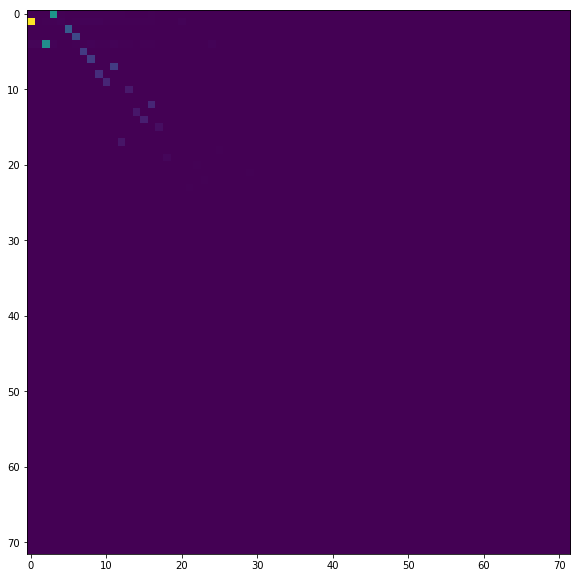

In [30]:
plt.figure(figsize=(10,10))
plt.imshow((graph+1)[:,:])
plt.show()

In [31]:
np.save("../data/graphs/ES3_22", graph)

In [63]:
import pickle

In [64]:
pickle.dump(cl_to_n, open("../data/dicts/ES3_cl_to_n", 'wb'))
pickle.dump(n_to_clust, open("../data/dicts/ES3_n_to_cl", 'wb'))
pickle.dump(nd, open("../data/dicts/ES3_nd", 'wb'))

In [62]:
graph[:34, : 34].sum(1).astype(int)

array([10275, 19554,  5491,  4214, 10752,  3242,  3339,  3377,  2543,
        2156,  1485,    10,  2047,  1383,  1461,   875,     7,  1097,
         142,   297,   123,   105,    88,    82,    23,    46,    61,
          71,    65,     1,    54,    41,    34,     7])

In [106]:
graph_norm = (graph) / (graph.sum(1)).reshape(-1, 1)

/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [107]:
(np.log(graph + 1)[0] / np.log(graph + 1).sum(1)[0]).sum()

1.0

In [108]:
graph_norm[0].sum()

1.0

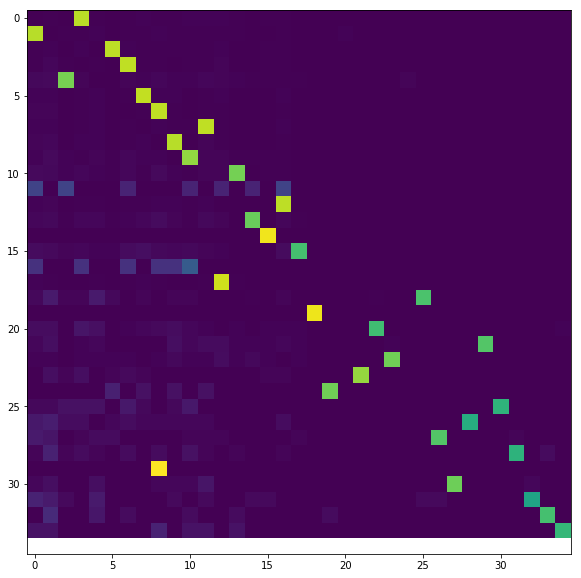

In [114]:
plt.figure(figsize=(10,10))
plt.imshow((graph_norm+1)[:35,:35])
plt.show()

In [30]:
graph_list = [x.tolist() for x in graph.astype(int)[:, :]]

In [31]:
gr = graph[:34,:34]

In [32]:
gr.shape

(34, 34)

In [33]:
def to_graph_all(gr):
    G=nx.Graph()
    G.add_nodes_from(np.arange(gr.shape[0]))
    
    for i in range(gr.shape[0]):
        for j in range(gr.shape[1]):

            G.add_edge(i, j, weight=gr[i][j], capacity=gr[i][j])
    return G

In [34]:
G = to_graph_all(gr)

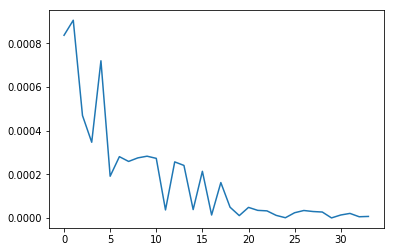

In [35]:
plt.plot(nx.clustering(G, weight='weight').values())
plt.show()

In [37]:
import networkx as nx

In [38]:
def to_graph(gr, edges_num):
    G=nx.DiGraph()
    G.add_nodes_from(np.arange(gr.shape[0]))
    
    edges = []
    curr_weight = 1000
    #while curr_weight > 100:
    for i in range(edges_num):
        lin_max = np.argmax(gr)
        curr_weight = np.max(gr)
        
        x, y = lin_max // gr.shape[0], lin_max % gr.shape[0]
        gr[x, :] = 0
        #gr[:, x] = 0

        G.add_edge(x, y)
        edges.append([x, y])
    
    #arr_to_sp(sp_9)
    return edges, G

In [112]:
graph = np.zeros((len(cl_to_n),len(cl_to_n)))

err = 0
for p in pairs_n:
    if len(p) == 2:
        graph[p[0]][p[1]] += 1  
        #graph[p[1]][p[0]] +=1
    else:
        err += 1
err

0

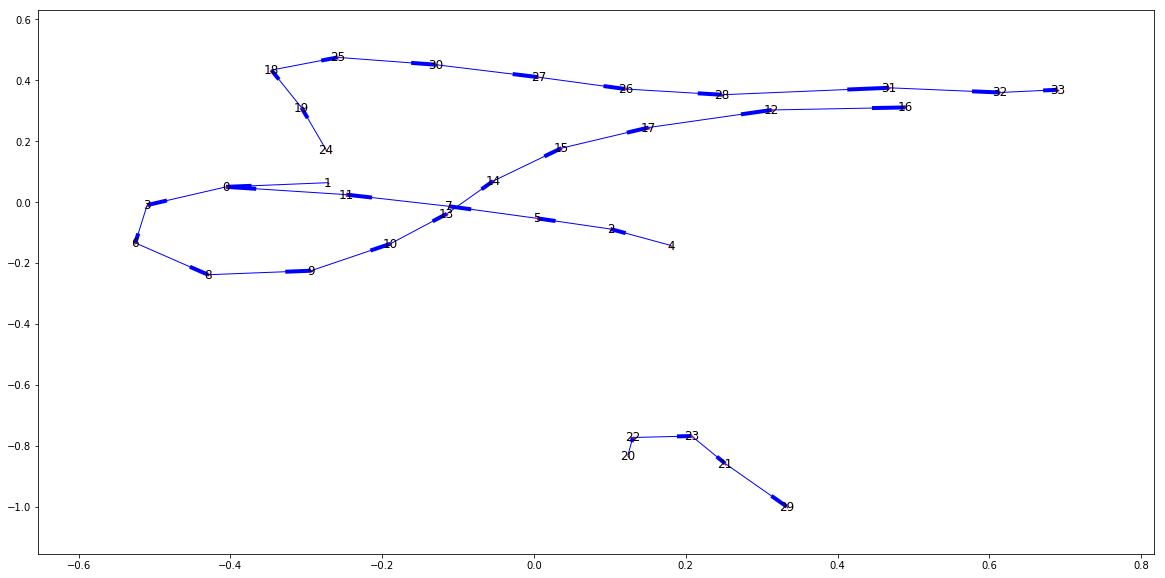

In [113]:

pairs, G = to_graph(graph[:34,:34], 31)

fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx(G, edge_color='b', node_size=1)
#nx.draw_networkx(G_ans, edge_color='r', node_size=1)
#nx.draw_networkx_edges(G, )
plt.show()

## Chain walker

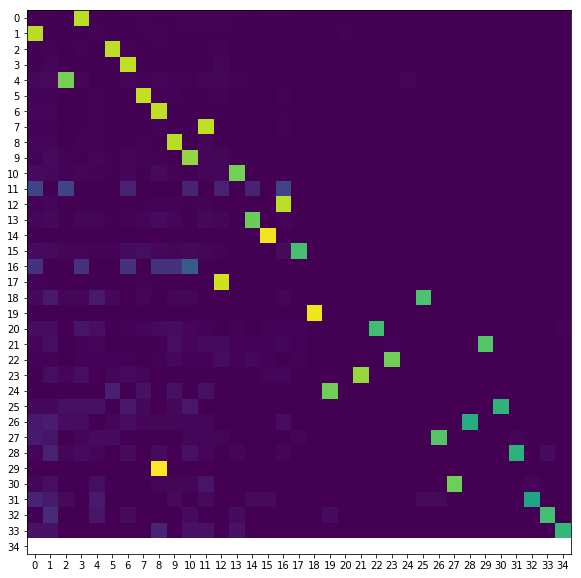

In [162]:
plt.figure(figsize=(10,10))
plt.imshow((graph_norm+1)[:35,:35])
plt.xticks(np.arange(35))
plt.yticks(np.arange(35))
plt.show()

In [166]:
graph_norm[:34][:34].sum(0)

array([1.83638023e+00, 9.42969568e-01, 1.21039039e+00, 1.42043774e+00,
       5.28888064e-01, 1.12300681e+00, 1.48240947e+00, 1.17275616e+00,
       2.41724122e+00, 1.37759451e+00, 1.61833512e+00, 1.31651910e+00,
       1.23758694e+00, 9.63861592e-01, 9.72999894e-01, 1.10363204e+00,
       1.33573060e+00, 7.80798285e-01, 9.75131198e-01, 8.16033235e-01,
       1.70113593e-02, 8.46683375e-01, 7.04173376e-01, 7.99167196e-01,
       1.35505457e-02, 7.44723920e-01, 7.60498498e-01, 7.79772137e-01,
       6.26190771e-01, 7.35670843e-01, 6.53573523e-01, 6.60479702e-01,
       6.04605226e-01, 7.38575776e-01, 6.75065594e-01, 1.00291119e-03,
       1.85890882e-04, 1.48403623e-04, 3.46985346e-04, 5.95169572e-04,
       0.00000000e+00, 0.00000000e+00, 9.72762646e-05, 2.37135404e-04,
       4.88281250e-04, 7.22543353e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.82049882e-04, 9.72762646e-05, 9.29454410e-05, 2.95857988e-04,
      

In [118]:
chain = [] 
curr = 0

chain.append(curr)
curr = np.argmax(graph_norm[curr])

3

In [132]:
chain.append(curr)
curr = np.argmax(graph_norm[curr])
print(chain) # add 1

[0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16]


In [140]:
curr = 2
chain_2 = []

In [144]:
chain_2.append(curr)
curr = np.argmax(graph_norm[curr])
print(chain_2)

[2, 5, 7, 11]


In [145]:
curr = 4
chain_3 = []

In [147]:
chain_3.append(curr)
curr = np.argmax(graph_norm[curr])
print(chain_3)

[4, 2]


## CHAIN WALKER 2

In [291]:
def plot_gr(gr, t, log = False, s=10):
    plt.figure(figsize=(s,s))
    if log:
        plt.imshow(np.log(gr[:t,:t] + 1))
    else:
        plt.imshow(gr[:t,:t])
    plt.colorbar()
    plt.xticks(np.arange(t))
    plt.yticks(np.arange(t))
    plt.show()

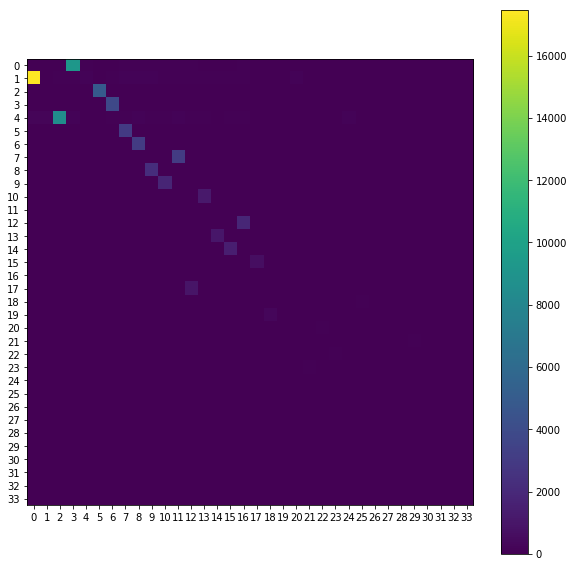

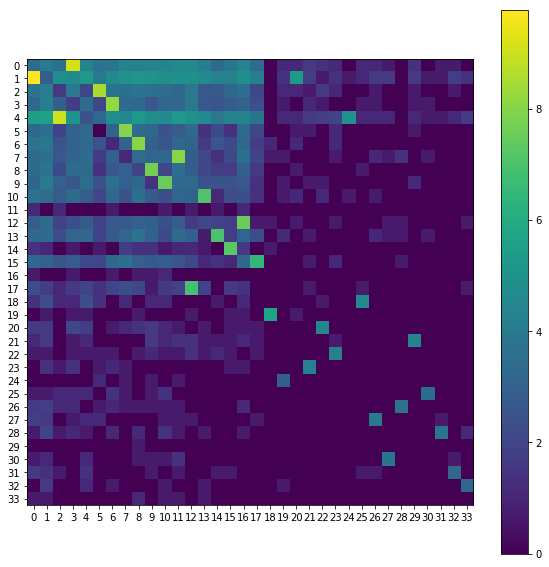

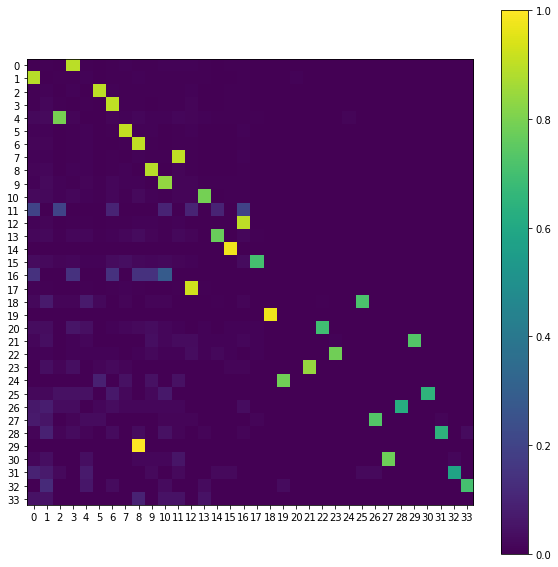

In [294]:
plot_gr(graph, 34, False, 10) 
plot_gr(graph, 34, True, 10) 
plot_gr(graph_norm, 34, s =10)

In [210]:
gr = graph[:35, :35]
grn = graph_norm[:35, :35]

In [211]:
gr.sum(1).astype(int)

array([10276, 19554,  5491,  4215, 10752,  3242,  3339,  3377,  2543,
        2156,  1485,    10,  2047,  1383,  1461,   875,     7,  1097,
         142,   297,   124,   105,    88,    82,    23,    46,    61,
          71,    65,     1,    54,    41,    34,    21,     0])

In [212]:
gr.sum(0).astype(int)

array([18083,   855,  8859,  9744,   554,  5147,  4330,  3483,  3730,
        2822,  2311,  3730,  1658,  1535,  1302,  1733,  2383,   814,
         294,    34,   205,    90,   104,    91,   140,   112,    68,
          52,    44,    91,    35,    46,    34,    35,    17])

In [218]:
terminate_vertexes = set(np.arange(35)[gr.sum(1).astype(int) <= 10])

In [219]:
terminate_vertexes

{11, 16, 29, 34}

In [280]:
# Way 1 
visited = dict()

all_cass = {}
cassette_num = 0 
for v in range(35):
#     print(all_cass)
#     print("--")
    if v not in visited.keys():
        cassette = []
        save_cassette = cassette_num
        while not v in terminate_vertexes:
            cassette.append(v)
            v = np.argmax(gr[v])
            if v in visited.keys():
                save_cassette = visited[v]
            visited[v] = save_cassette
        cassette.append(v)
        #if len(cassette) != 0 : 
        #    print(cassette)

        all_cass[save_cassette] = cassette
        
        cassette = []
        cassette_num += 1
        

In [281]:
all_cass

{0: [1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16],
 2: [4, 2, 5, 7, 11],
 4: [24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34],
 6: [20, 22, 23, 21, 29]}

In [256]:
### ANSW

In [258]:
ans_3 = ["CAGCGTCAGGCGTGAAATCTCACCGTCGTTGC	TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG	GTAGTCCATCATTCCACCTATGTCTGAACTCC	CCGGGGGATAATGTTTACGGTCATGCGCCCCC	TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCAG	AAGCTGGCTGGCAATCTCTTTCGGGGTGAGTC	TAGTTTCCGTATCTCCGGATTTATAAAGCTGA	GCAGGCGGCGACGCGCAGGGTATGCGCGATTCG	GCGACCGCTCAGAAATTCCAGACCCGATCCAAA	TCAACATTATCAATTACAACCGACAGGGAGCC	AGCGTGTTCGGCATCACCTTTGGCTTCGGCTG	TGCGTGAGCGTATCGCCGCGCGTCTGCGAAAG",
"GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC	CTGTTTTCGCAAATCTATGGACTATTGCTATT	GGGCGCACGGAATACAAAGCCGTGTATCTGCT	TGGCTCTGCAACAGCAGCACCCATGACCACGT	GAAATGCTGGTGAGCGTTAATGCCGCAAACAC	ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC",
"GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC	ACACGCCCTTATCAAATAGCTGTGATTTACCTA	ATAGACCCCGAACAACAATACGCGCAAACCGA	TACCGTACAGACTGCCGGATATTATTTTTTTG	CTGCTGCTCGAGCTGGTGGAGTGCTGCTATAG	AACGTCAGGTTGTCGCCGCTCTGCGTGGTCGC	TGCATGGCTTTGGCTTCCTCTTTGACGGACGC	ATATATCAGAGCAAAAAACAAAGCCACAGCCA	CATAAAGAAACTATTTTGCGTTTCGTTCAGGT	TTTTACAGTGTCAACAATCGTTCCCTGATTGT	CCGCCGTTGGCACCGTCAAACTCCGGTACTGT	TATAGAGATCGTTTTTGGAATTTACAGCGAGG	CCGTAAGTGGTTTGAGCGATGATATTTGTGCT",
"AGTGCTGGACCATTTCAAATTCACAATAGATT	GGAATGATATTTCAATAAATAATTATAACAAT	CCCTCACACCGATTCGCCAAACGGTGGAGAAG	AGCTGGGCGAAATTTTGATTCATCGTGATGAC"]

ans_3_31 = []
for seq in ans_3:
    for sp in seq.split("\t"):
        ans_3_31.append(sp[:31])



In [274]:
ans_3[2]

'GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC\tACACGCCCTTATCAAATAGCTGTGATTTACCTA\tATAGACCCCGAACAACAATACGCGCAAACCGA\tTACCGTACAGACTGCCGGATATTATTTTTTTG\tCTGCTGCTCGAGCTGGTGGAGTGCTGCTATAG\tAACGTCAGGTTGTCGCCGCTCTGCGTGGTCGC\tTGCATGGCTTTGGCTTCCTCTTTGACGGACGC\tATATATCAGAGCAAAAAACAAAGCCACAGCCA\tCATAAAGAAACTATTTTGCGTTTCGTTCAGGT\tTTTTACAGTGTCAACAATCGTTCCCTGATTGT\tCCGCCGTTGGCACCGTCAAACTCCGGTACTGT\tTATAGAGATCGTTTTTGGAATTTACAGCGAGG\tCCGTAAGTGGTTTGAGCGATGATATTTGTGCT'

In [275]:
a_3 = []
for seq in ans_3:
    a_3.append(seq.split("\t"))

In [282]:
a_3

[['CAGCGTCAGGCGTGAAATCTCACCGTCGTTGC',
  'TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG',
  'GTAGTCCATCATTCCACCTATGTCTGAACTCC',
  'CCGGGGGATAATGTTTACGGTCATGCGCCCCC',
  'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCAG',
  'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGTC',
  'TAGTTTCCGTATCTCCGGATTTATAAAGCTGA',
  'GCAGGCGGCGACGCGCAGGGTATGCGCGATTCG',
  'GCGACCGCTCAGAAATTCCAGACCCGATCCAAA',
  'TCAACATTATCAATTACAACCGACAGGGAGCC',
  'AGCGTGTTCGGCATCACCTTTGGCTTCGGCTG',
  'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAAG'],
 ['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC',
  'CTGTTTTCGCAAATCTATGGACTATTGCTATT',
  'GGGCGCACGGAATACAAAGCCGTGTATCTGCT',
  'TGGCTCTGCAACAGCAGCACCCATGACCACGT',
  'GAAATGCTGGTGAGCGTTAATGCCGCAAACAC',
  'ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC'],
 ['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC',
  'ACACGCCCTTATCAAATAGCTGTGATTTACCTA',
  'ATAGACCCCGAACAACAATACGCGCAAACCGA',
  'TACCGTACAGACTGCCGGATATTATTTTTTTG',
  'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATAG',
  'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCGC',
  'TGCATGGCTTTGGCTTCCTCTTTGACGGACGC',
  'ATATATCAGAGCAAAAAACAAAGCCACAGCCA',
  'CATA

In [283]:
for ch in all_cass.values():
    for sp in ch:
        print(n_to_clust[sp])
    print("-------------")

GACAGAACGGCCTCAGTAGTCTCGTCAGGCT
ACACGCCCTTATCAAATAGCTGTGATTTACC
ATAGACCCCGAACAACAATACGCGCAAACCG
TACCGTACAGACTGCCGGATATTATTTTTTT
CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA
AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG
TGCATGGCTTTGGCTTCCTCTTTGACGGACG
ATATATCAGAGCAAAAAACAAAGCCACAGCC
CATAAAGAAACTATTTTGCGTTTCGTTCAGG
TTTTACAGTGTCAACAATCGTTCCCTGATTG
CCGCCGTTGGCACCGTCAAACTCCGGTACTG
TATAGAGATCGTTTTTGGAATTTACAGCGAG
CCGTAAGTGGTTTGAGCGATGATATTTGTGC
-------------
CAAGTGATATCCATCATCGCATCCAGTGCGC
AGTGCTGGACCATTTCAAATTCACAATAGAT
GGAATGATATTTCAATAAATAATTATAACAA
CCCTCACACCGATTCGCCAAACGGTGGAGAA
AGCTGGGCGAAATTTTGATTCATCGTGATGA
-------------
CAGCGTCAGGCGTGAAATCTCACCGTCGTTG
TCGGTTCAGGCGTTGCAAACCTGGCTACCGG
GTAGTCCATCATTCCACCTATGTCTGAACTC
CCGGGGGATAATGTTTACGGTCATGCGCCCC
TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCA
AAGCTGGCTGGCAATCTCTTTCGGGGTGAGT
TAGTTTCCGTATCTCCGGATTTATAAAGCTG
GCAGGCGGCGACGCGCAGGGTATGCGCGATT
GCGACCGCTCAGAAATTCCAGACCCGATCCA
TCAACATTATCAATTACAACCGACAGGGAGC
AGCGTGTTCGGCATCACCTTTGGCTTCGGCT
TGCGTGAGCGTATCGCCGCGCGTCTGCGAAA
------------

In [323]:
for a,b in zip(["emp"] + all_cass[6], a_3[1]):
    print(n_to_clust[a], b)

______________emp______________ GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC
CTGTTTTCGCAAATCTATGGACTATTGCTAT CTGTTTTCGCAAATCTATGGACTATTGCTATT
GGGCGCACGGAATACAAAGCCGTGTATCTGC GGGCGCACGGAATACAAAGCCGTGTATCTGCT
TGGCTCTGCAACAGCAGCACCCATGACCACG TGGCTCTGCAACAGCAGCACCCATGACCACGT
GAAATGCTGGTGAGCGTTAATGCCGCAAACA GAAATGCTGGTGAGCGTTAATGCCGCAAACAC
ATTACGCCTTTTTGCGATTGCCCGGTTTTTG ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC


In [322]:
n_to_clust["emp"] = "______________emp______________"

In [300]:
all_cass

{0: [1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16],
 2: [4, 2, 5, 7, 11],
 4: [24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34],
 6: [20, 22, 23, 21, 29]}

In [279]:
cl_to_n

{'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG': 9,
 'AACTGGATTCTGCTCTAATTATTACATCATC': 46,
 'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGT': 27,
 'AAGTTCGACAACTTAAAAAATGATAACAAGT': 35,
 'AATTGGTGTGAGATGCATCTCTTCCTCACC': 42,
 'ACACGCCCTTATCAAATACACAATAGATT': 61,
 'ACACGCCCTTATCAAATAGCTGCTATAG': 59,
 'ACACGCCCTTATCAAATAGCTGTGATTTACC': 0,
 'ACACGCCCTTATCACCATAAAGAAACTATTT': 58,
 'AGCGTGTTCGGCATCACCTTTGGCTTCGGCT': 33,
 'AGCTGGGCGAAATTTTGATTCATCGTGATGA': 11,
 'AGCTGGGCGAAATTTTGGAATTTACAGCGAG': 64,
 'AGCTGGGCGAACAACAATACGCGCAAACCGA': 49,
 'AGTGCTGGACCATTTCAAAGCCACAGCCA': 67,
 'AGTGCTGGACCATTTCAAATAGCTGTGATTT': 36,
 'AGTGCTGGACCATTTCAAATTCACAATAGAT': 2,
 'AGTGCTGGACCATTTCACAATAGAT': 54,
 'ATAATGCTCATGAGCAGGCATAGGATTGACG': 51,
 'ATAGACCCCGAACAACAAAGCCACAGCC': 53,
 'ATAGACCCCGAACAACAATACGCGCAAACCG': 3,
 'ATAGCCCCCAAACAACAATCCGCGCACCCGG': 48,
 'ATATATCAGAGCAAAAAACAAAGCCACAGCC': 13,
 'ATATATCAGAGCTGGTGGAGTGCTGCTATAG': 68,
 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTG': 29,
 'CAAGTGATATCCATCATCGCATCCAGTGCGC': 4,
 'CAAGTGATATCCATCATCGC